# Building K-means Clustering: Step by Step

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_table('ex7data2.txt', sep=',', header=None, dtype=np.float32)
data

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904016,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [3]:
X_train = data.values

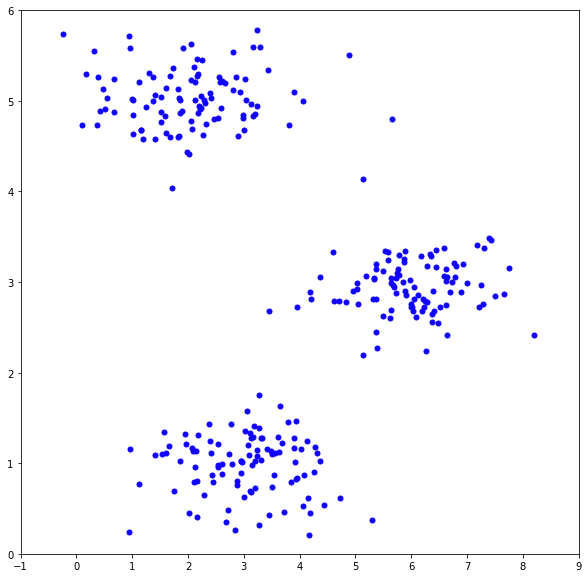

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax.axis([-1, 9, 0, 6])
ax.plot(X_train[:,0], X_train[:,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 

In [5]:
class KMeans():
    
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def __call__(self, inputs):
        idx = np.zeros((inputs.shape[0],),dtype='int32')
        for i in range(inputs.shape[0]):
            d = np.sum(np.square(inputs[i,:]-self.centroids), axis=1)
            idx[i] = np.argmin(d)
        return idx
        
    def predict(self, inputs):
        idx = self(inputs)
        return idx
    
    def initCentroids(self, X):
        indexes = np.random.randint(X.shape[0], size=self.n_clusters)
        centroids = X[indexes,:]
        return centroids
    
    def computeCentroids(self, X, idx):
        m,n = X.shape
        centroids = np.zeros((self.n_clusters, n))
        for i in range(self.n_clusters):
            indexes = (idx == i)
            if len(X[indexes,:]) != 0:
                centroids[i,:] = np.mean(X[indexes,:], axis=0)
        return centroids
                   
    def fit(self, X_train, epochs=100):
        self.centroids = self.initCentroids(X_train)
        print('Training...')
        for epoch in range(epochs):
            start_time = time.time()
            idx = self(X_train)
            self.centroids = self.computeCentroids(X_train, idx)
            loss = np.mean(np.sum(np.square(X_train-self.centroids[idx,:]), axis=1))
            now = time.time()
            duration = now - start_time
            print('Epochs {}/{} - Loss: {}'.format(epoch+1, epochs, loss))
            print('----- {}s -----'.format(np.round(1000*duration)/1000))

In [6]:
model = KMeans(n_clusters=3)

model.fit(X_train)

Training...
Epochs 1/100 - Loss: 0.8924641680904551
----- 0.006s -----
Epochs 2/100 - Loss: 0.8888617256232128
----- 0.006s -----
Epochs 3/100 - Loss: 0.8888617256232128
----- 0.008s -----
Epochs 4/100 - Loss: 0.8888617256232128
----- 0.006s -----
Epochs 5/100 - Loss: 0.8888617256232128
----- 0.009s -----
Epochs 6/100 - Loss: 0.8888617256232128
----- 0.007s -----
Epochs 7/100 - Loss: 0.8888617256232128
----- 0.006s -----
Epochs 8/100 - Loss: 0.8888617256232128
----- 0.006s -----
Epochs 9/100 - Loss: 0.8888617256232128
----- 0.006s -----
Epochs 10/100 - Loss: 0.8888617256232128
----- 0.007s -----
Epochs 11/100 - Loss: 0.8888617256232128
----- 0.006s -----
Epochs 12/100 - Loss: 0.8888617256232128
----- 0.005s -----
Epochs 13/100 - Loss: 0.8888617256232128
----- 0.007s -----
Epochs 14/100 - Loss: 0.8888617256232128
----- 0.005s -----
Epochs 15/100 - Loss: 0.8888617256232128
----- 0.007s -----
Epochs 16/100 - Loss: 0.8888617256232128
----- 0.007s -----
Epochs 17/100 - Loss: 0.8888617256232

In [7]:
X_clusters = model.predict(X_train)
X_clusters

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], d

In [8]:
X_centroids = model.centroids[X_clusters,:]
X_centroids

array([[1.95399475, 5.02557039],
       [6.03366756, 3.00052452],
       [6.03366756, 3.00052452],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.95399475, 5.02557039],
       [1.

In [9]:
np.mean(np.sum(np.square(X_train-X_centroids), axis=1))

0.8888617256232128

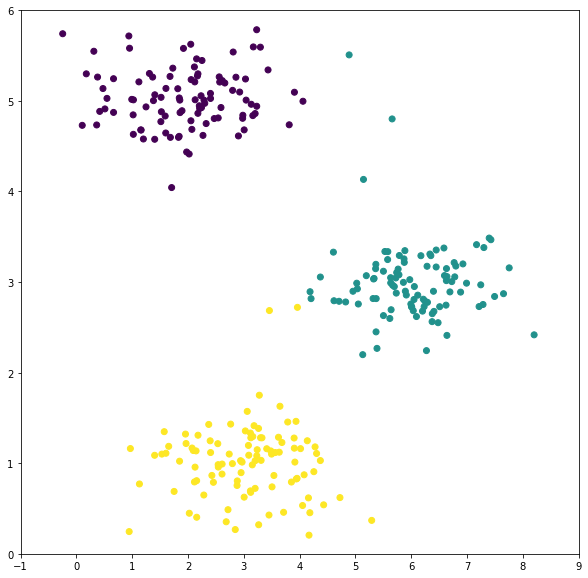

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6])
ax.axis([-1, 9, 0, 6])
ax.scatter(X_train[:,0],X_train[:,1],c=X_clusters)

-----

In [11]:
img = plt.imread("bird_small.png")
img

array([[[0.85882354, 0.7058824 , 0.40392157],
        [0.9019608 , 0.7254902 , 0.45490196],
        [0.8862745 , 0.7294118 , 0.43137255],
        ...,
        [0.05490196, 0.05882353, 0.05098039],
        [0.05098039, 0.05882353, 0.04705882],
        [0.04705882, 0.05490196, 0.04705882]],

       [[0.9019608 , 0.75686276, 0.46666667],
        [0.8784314 , 0.7529412 , 0.47058824],
        [0.8862745 , 0.7529412 , 0.4862745 ],
        ...,
        [0.0627451 , 0.0627451 , 0.05098039],
        [0.05490196, 0.05882353, 0.03921569],
        [0.04313726, 0.05490196, 0.03529412]],

       [[0.89411765, 0.7490196 , 0.48235294],
        [0.89411765, 0.7490196 , 0.4745098 ],
        [0.8627451 , 0.7254902 , 0.4627451 ],
        ...,
        [0.05490196, 0.0627451 , 0.05098039],
        [0.05098039, 0.05098039, 0.04313726],
        [0.04313726, 0.05882353, 0.03921569]],

       ...,

       [[0.05882353, 0.07058824, 0.0627451 ],
        [0.07058824, 0.08235294, 0.07058824],
        [0.07058824, 0

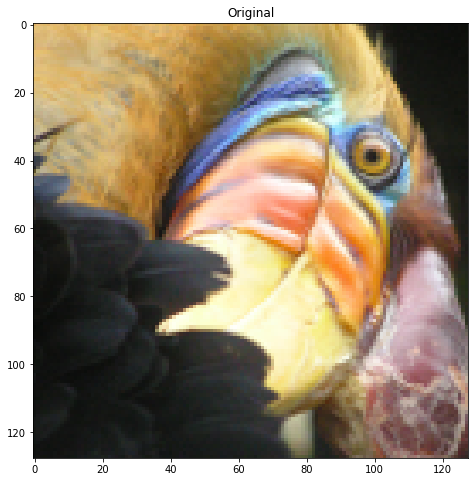

In [12]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Original')
ax1.imshow(img)

In [13]:
X_train = img.reshape((img.shape[0]*img.shape[1], 3))

In [14]:
model = KMeans(n_clusters=16)

model.fit(X_train)

Training...
Epochs 1/100 - Loss: 0.012122153898501058
----- 0.202s -----
Epochs 2/100 - Loss: 0.009461472282316806
----- 0.223s -----
Epochs 3/100 - Loss: 0.00883083087013792
----- 0.205s -----
Epochs 4/100 - Loss: 0.00867312740212916
----- 0.209s -----
Epochs 5/100 - Loss: 0.00860502572474341
----- 0.211s -----
Epochs 6/100 - Loss: 0.008558212743036524
----- 0.22s -----
Epochs 7/100 - Loss: 0.008510686078323733
----- 0.209s -----
Epochs 8/100 - Loss: 0.008463091906800134
----- 0.212s -----
Epochs 9/100 - Loss: 0.008413164508402488
----- 0.207s -----
Epochs 10/100 - Loss: 0.008358072712596375
----- 0.214s -----
Epochs 11/100 - Loss: 0.008298244247062046
----- 0.202s -----
Epochs 12/100 - Loss: 0.008235805433411306
----- 0.219s -----
Epochs 13/100 - Loss: 0.008150431061932565
----- 0.208s -----
Epochs 14/100 - Loss: 0.008058769840949331
----- 0.201s -----
Epochs 15/100 - Loss: 0.007985194510384241
----- 0.211s -----
Epochs 16/100 - Loss: 0.007923666775682736
----- 0.225s -----
Epochs 17

In [15]:
X_clusters = model.predict(X_train)
X_clusters

array([ 4,  4,  4, ...,  8, 15, 15], dtype=int32)

In [16]:
X_centroids = model.centroids[X_clusters,:]
X_centroids

array([[0.86410189, 0.71682698, 0.45940492],
       [0.86410189, 0.71682698, 0.45940492],
       [0.86410189, 0.71682698, 0.45940492],
       ...,
       [0.26178789, 0.23362575, 0.22280937],
       [0.14883417, 0.15400791, 0.14579472],
       [0.14883417, 0.15400791, 0.14579472]])

In [17]:
np.mean(np.sum(np.square(X_train-X_centroids), axis=1))

0.007193813703179068

In [18]:
im = np.zeros(X_train.shape)
X_clusters = model.predict(X_train)
for i in range(16):
    indexes = (X_clusters == i)
    if len(X_train[indexes,:]) != 0:
        im[indexes,:] = model.centroids[i,:]

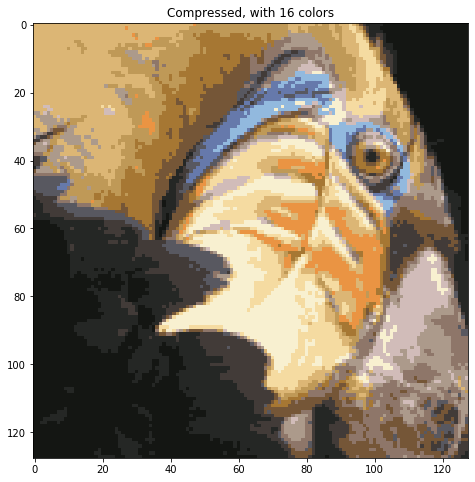

In [19]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Compressed, with 16 colors')
ax.imshow(im.reshape(img.shape))